In [1]:
using Pkg;
Pkg.activate(".")
Pkg.instantiate()

  Activating project at `~/Work/PhD_Thesis/SNImproved2bbSpectra/notebooks`


In [2]:
# Pkg.add("Revise")
# Pkg.add("StatsPlots")
# Pkg.add("UnROOT")
# Pkg.add("StatsBase")
# Pkg.add("LinearAlgebra")
# Pkg.add("FHist")
# Pkg.add("DataFramesMeta")
# Pkg.add("DataFrames")
# Pkg.add("Distributions")
# Pkg.add("Polynomials");

In [3]:
using Revise
using StatsPlots, UnROOT, StatsBase, LinearAlgebra
using Distributions

theme(
    :dao;
    size = (800, 800),
    legend = :topleft,
    guidefontsize = 16,
    tickfontsize = 12,
    titlefontsize = 16,
    legendfontsize = 12,
    left_margin = 4Plots.mm,
    right_margin = 8Plots.mm,
    top_margin = 4Plots.mm,
    bottom_margin = 6Plots.mm,
    dpi = 200,
    :colorbar_titlefontsize => 20,
    widen = :false,
    :markerstrokewidth => 1,
    :markerstrokecolor => :black,
);

[ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
┌ Warning: backend `GR` is not installed.
└ @ Plots ~/.julia/packages/Plots/3BCH5/src/backends.jl:43
[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]
[ Info: Precompiling UnROOT [3cd96dde-e98d-4713-81e9-a4a1b0235ce9]


In [4]:
include("/home/shoram/Work/PhD_Thesis/SNAngularCorrelation/AngularCorrelations/MiscFuncs.jl")
using .MiscFuncs

LoadError: LoadError: ArgumentError: Package FHist not found in current path.
- Run `import Pkg; Pkg.add("FHist")` to install the FHist package.
in expression starting at /home/shoram/Work/PhD_Thesis/SNAngularCorrelation/AngularCorrelations/MiscFuncs.jl:1

Sampling Rejection

In [5]:

function solve_quadratic(a, b, c)
    d  = sqrt(b^2 - 4*a*c)
    return (-b - d) / (2*a), (-b + d) / (2*a)
end

solve_quadratic (generic function with 1 method)

In [6]:
function sample_theta_dif(_k::Real)
    
    if (_k == 0.0)
        return 0.5
    end
    
    a = _k/4 
    b = 1/2
    c = 1/2 - _k/4 - rand(Uniform())
    θ = solve_quadratic(a,b,c)
    if( -1.0 <= θ[1] <= 1.0 )
        return θ[1]
    elseif ( -1.0 <= θ[2] <= 1.0 )
        return θ[2]
    else
        @show "soulution is outside of range u ∈ (-1.0, 1.0)"
    end
    return -100.0
end

sample_theta_dif (generic function with 1 method)

In [7]:
xs1 = []
xs2 = []

for _ in 1:1e8
    push!(xs1, sample_theta_dif(-0.88))
    push!(xs2, sample_theta_dif(-0.66))
       
end

In [24]:
sh1 = StatsBase.fit(Histogram{Float32},acosd.(xs1), collect(0:1:180) )
sh2 = StatsBase.fit(Histogram{Float32},acosd.(xs2), collect(0:1:180) )


Histogram{Float32, 1, Tuple{Vector{Int64}}}
edges:
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9  …  171, 172, 173, 174, 175, 176, 177, 178, 179, 180]
weights: Float32[2585.0, 7817.0, 12901.0, 18514.0, 23480.0, 28535.0, 33934.0, 39432.0, 44815.0, 50051.0  …  237144.0, 213855.0, 187744.0, 164222.0, 139301.0, 113449.0, 88295.0, 63127.0, 38108.0, 12615.0]
closed: left
isdensity: false

In [9]:
# sh1.weights = sh1.weights ./ maximum(sh1.weights)
# sh2.weights = sh2.weights ./ maximum(sh2.weights)


180-element Vector{Float32}:
 0.0025541736
 0.0077237817
 0.012747155
 0.018293219
 0.0232
 0.028194718
 0.033529334
 0.038961772
 0.044280577
 0.049454138
 0.05520078
 0.060531445
 0.066159524
 ⋮
 0.2824837
 0.25948626
 0.23431604
 0.21130477
 0.18550514
 0.16226365
 0.13763982
 0.11209611
 0.087242074
 0.062374204
 0.037653558
 0.012464565

In [10]:
using LaTeXStrings

In [11]:
gc()

LoadError: UndefVarError: `gc` not defined

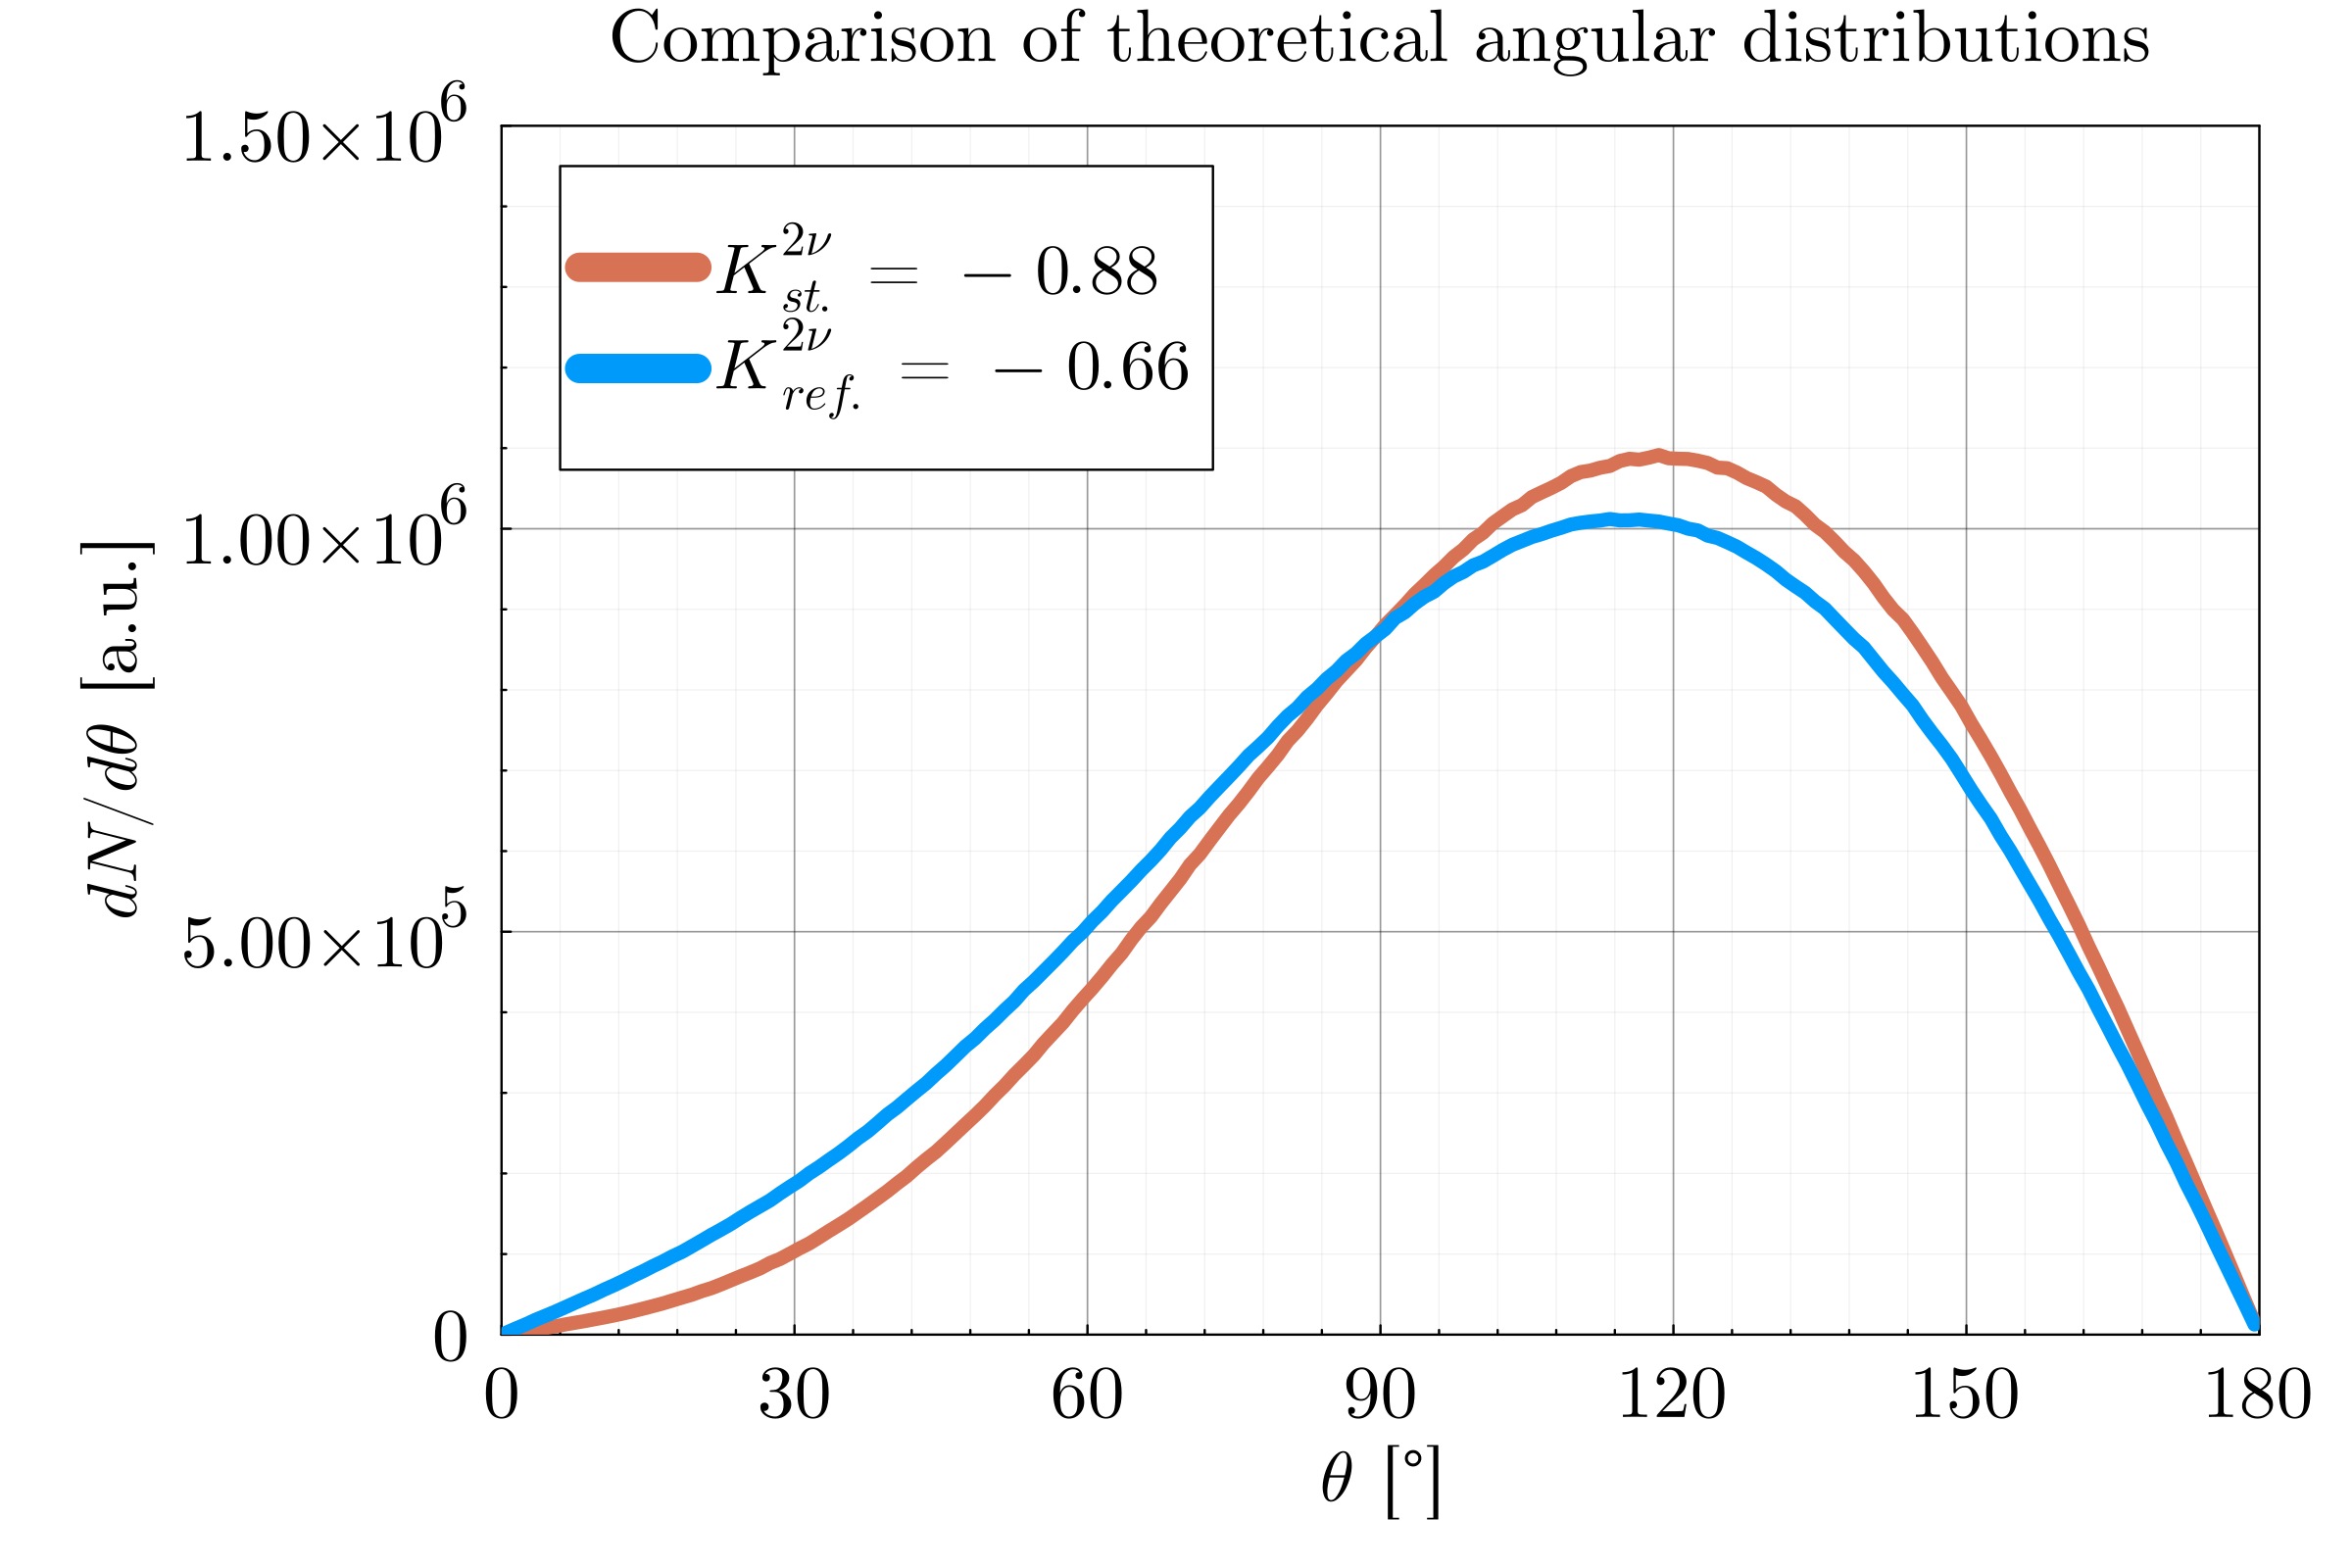

In [34]:
plot(
    midpoints(sh1.edges[1]),
    [sh1.weights],
    series_type= :stepmid,
    label =L"K^{2\nu}_{st.} = -0.88 ",
    lw = 6,
    xlims = (0,180),
    legend= :topleft,
#     widen=:false,
    ylims = (0,1.5e6),
    ylabel = L"dN/d\theta "*" [a.u.]",
    xlabel = L"\theta "*" [°]",
    thickness_scaling = 1.2,
    size = (1200, 800),
    guidefontsize = 20,
    legendfontsize = 20,
    tickfontsize = 20,
    titlefontsize = 20,
)
plot!(
    midpoints(sh2.edges[1]),
    [sh2.weights],
    series_type= :stepmid,
    label =L"K^{2\nu}_{ref.} = -0.66 ",
    lw = 6,
    xlims = (0,180),
    legend= :topleft,
    title = "Comparison of theoretical angular distributions"
)

In [35]:
savefig("../Figs/TwoKappasCompareTheoAngDist.pdf")

"/home/shoram/Work/PhD_Thesis/SNImproved2bbSpectra/Figs/TwoKappasCompareTheoAngDist.pdf"

In [15]:
stephist(
    [xs1 xs2 xs3], 
    xlabel ="θ [°]",
    ylabel ="normalized decay rate [a.u.]",
    label  =["-0.88" "-1" "-0.65"],
    lw = 4,
#     ylims = (0.0, 0.012),
    xlims = (-1,1),
    legend= :topleft,
    widen=:false
)

LoadError: UndefVarError: `xs3` not defined

In [16]:
gr()

Plots.GRBackend()